# 1. Data Preparation

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
data=digits['data']
images=digits['images']
target=digits['target']
target_names=digits['target_names']

(8, 8)


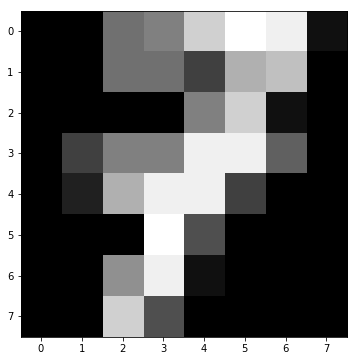

In [4]:
img = images[(np.where(target == 7)[0][0])]
print(img.shape)
plt.figure()
plt.gray()
plt.imshow(img,interpolation="nearest");

In [5]:
def filter_numbers(number1,number2):
    """Returns subset of digits sample data containing only the numbers passed to the function
        
       Takes number1 and number2 of the target_names as its arguments
       Returns two arrays: data, target
    """
    #if number1 and number2:
    if True:
        indices = np.where((digits['target'] == number1) | (digits['target'] == number2))
        #print(indices)
        data = (digits['data'])[indices]
        target = (digits['target'])[indices]
        #print(indices)
    return data, target

In [6]:
data17,target17=filter_numbers(1,7)
np.shape(data17)

(361, 64)

Split data in train and test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(data17,target17, test_size=0.2)

Plot the "mean" picture of both numbers.
Pixel [19] is nearly black for number 7 and white for number 1.
Also pixel [61] is black for number 7 and grey for number 1.

In [8]:
def mean_plot(number):
    img = np.mean([images[j] for j in range(len(images)) if target[j]==number], axis = 0)
    return img

def median_plot(number):
    img = np.median([images[j] for j in range(len(images)) if target[j]==number], axis = 0)
    return img

Text(0.5,1,'median')

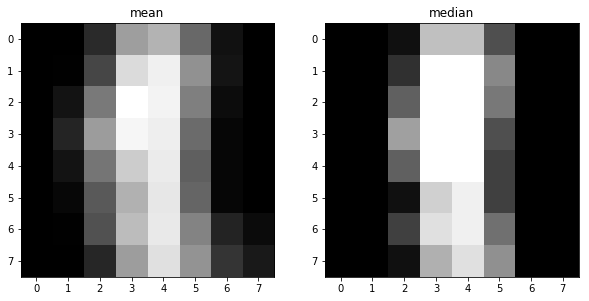

In [9]:
fig,ax=plt.subplots(1,2)
plt.gray()
ax[0].imshow(mean_plot(1))
ax[0].set_title("mean")
ax[1].imshow(median_plot(1))
ax[1].set_title("median")

Text(0.5,1,'median')

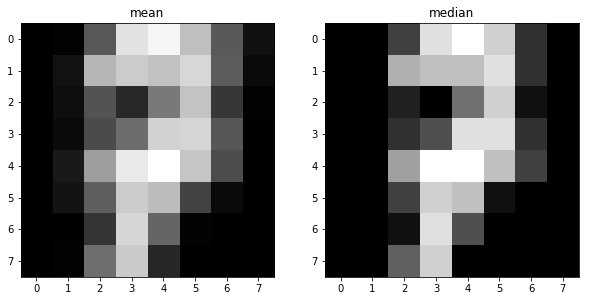

In [10]:
fig,ax=plt.subplots(1,2)
plt.gray()
ax[0].imshow(mean_plot(7))
ax[0].set_title("mean")
ax[1].imshow(median_plot(7))
ax[1].set_title("median")

In [11]:
print("Max difference mean: ",np.argmax(np.abs(mean_plot(7)-mean_plot(1))))
print("Min difference mean: ",np.argmin(np.abs(mean_plot(7)-mean_plot(1))))
print("Max difference median: ",np.argmax(np.abs(median_plot(7)-median_plot(1))))
print("Min difference median: ",np.argmin(np.abs(median_plot(7)-median_plot(1))))
print(np.abs(median_plot(7)-median_plot(1)))


Max difference mean:  19
Min difference mean:  0
Max difference median:  19
Min difference median:  0
[[  0.    0.    3.    2.    4.    8.    3.    0. ]
 [  0.    0.    8.    4.    4.    5.5   3.    0. ]
 [  0.    0.    4.   16.    9.    5.5   1.    0. ]
 [  0.    0.    7.   11.    2.    9.    3.    0. ]
 [  0.    0.    4.    0.    0.    8.    4.    0. ]
 [  0.    0.    3.    0.    3.    3.    0.    0. ]
 [  0.    0.    3.    0.   10.    7.    0.    0. ]
 [  0.    0.    5.    2.   14.    9.    0.    0. ]]


### Dimension Reduction

In [12]:
def reduced_dim(x):
    res=np.empty([np.shape(x)[0],2])
    for i in range(len(x)):
        # Define the features here:
        
        res[i][0]=x[i][60]# Feature 1
        res[i][1]=x[i][19]         # Feature 2
        
    return res

(array([83, 24,  8, 16, 11, 19, 16, 23, 28, 60]), array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
        14.4,  16. ]))


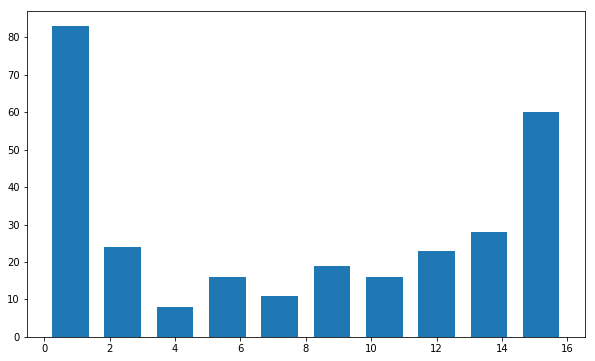

<Container object of 10 artists>

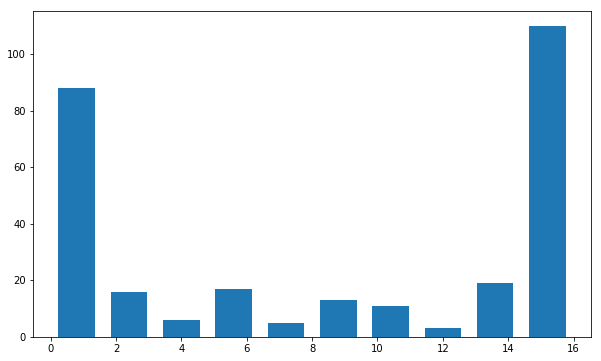

In [13]:
reduced_x=reduced_dim(X_train)
print(np.histogram(reduced_dim(X_train)[:,0]))
#plt.plot(np.histogram(reduced_dim(X_train)[:,0]))
hist, bins = np.histogram(reduced_dim(X_train)[:,0])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
hist, bins = np.histogram(reduced_dim(X_train)[:,1])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

In [14]:
# To differentiate in the scatter plot between the two classes

reduced1=[reduced_x[i] for i in range(len(reduced_x)) if target17[i]==1]
reduced7=[reduced_x[i] for i in range(len(reduced_x)) if target17[i]==7]

Text(0.5,1,'Dimension reduction - feature check')

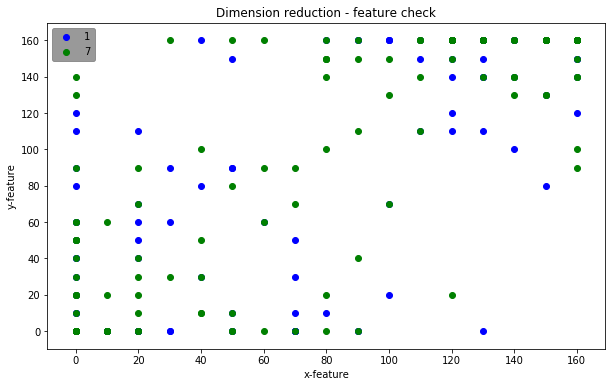

In [15]:
x1=[reduced1[i][0]*10 for i in range(len(reduced1))]
#x1=x1/np.max(x1)
y1=[reduced1[i][1]*10 for i in range(len(reduced1))]
#y1=y1/np.max(y1)
x7=[reduced7[i][0]*10 for i in range(len(reduced7))]
#x7=x7/np.max(x7)
y7=[reduced7[i][1]*10 for i in range(len(reduced7))]
#y7=y7/np.max(y7)
plt.scatter(x1,y1,color='b',label='1')
plt.scatter(x7,y7,color='g',label='7')

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_color('grey')

plt.xlabel("x-feature")
plt.ylabel('y-feature')
plt.title('Dimension reduction - feature check')

# 2. Nearest Mean

In [16]:
def nearest_mean(training_features, training_labels, test_features):
    mean1=np.empty([2,1])
    mean7=np.empty([2,1])
    mean1=sum([training_features[i] for i in range(\
        len(training_features)) if training_labels[i]==1])
    mean1=mean1/np.count_nonzero(training_labels==1)
    mean7=sum([training_features[i] for i in range(\
        len(training_features)) if training_labels[i]==7])
    mean7=mean7/np.count_nonzero(training_labels==7)
    predicted_labels=np.empty([len(test_features),1])
    for i in range(len(predicted_labels)):
        dis1=np.linalg.norm(mean1-test_features[i])
        dis2=np.linalg.norm(mean7-test_features[i])
        if dis1 <= dis2:
            predicted_labels[i]=1
        else:
            predicted_labels[i]=7
    return predicted_labels

In [17]:
reduced_test=reduced_dim(X_test)
predicted_labels=nearest_mean(reduced_x,y_train,reduced_test)
counter=0
for x,y in zip(predicted_labels,y_test):
    if x==y:
        counter+=1
print("Elements classified correctly: ",counter," (in Total: ",len(y_test)," elements.)")

Elements classified correctly:  71  (in Total:  73  elements.)


In [18]:
training_features=reduced_x
training_labels=y_train

mean1=np.empty([2,1])
mean7=np.empty([2,1])
mean1 = np.mean([training_features[j] for j in range(len\
        (training_features)) if training_labels[j]==1], axis = 0)

mean7 = np.mean([training_features[j] for j in range(len\
        (training_features)) if training_labels[j]==7], axis = 0)


#mean1=sum([training_features[i] for i in range(\
#        len(training_features)) if training_labels[i]==1])
#mean1=mean1/np.count_nonzero(training_labels==1)
#mean7=sum([training_features[i] for i in range(\
#        len(training_features)) if training_labels[i]==7])
#mean7=mean7/np.count_nonzero(training_labels==7)
   
    
a=0
matrix=np.empty([200,200])
for i in range(200):
    for j in range(200):
        i_=i/10
        j_=j/10
        dis1=np.linalg.norm(mean1-np.array([i_,j_]))
        dis2=np.linalg.norm(mean7-np.array([i_,j_]))
        if dis1>dis2:
            a=0
        else:
            a=1
        matrix[i,j]=a

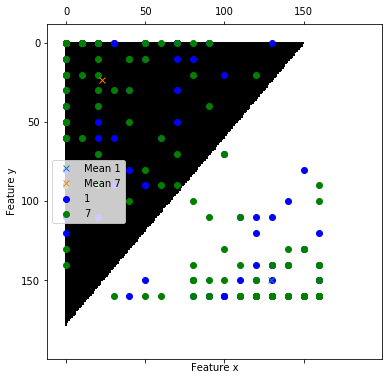

In [19]:
plt.matshow(matrix);
plt.plot(mean1[0]*10,mean1[1]*10,'x',label="Mean 1")
plt.plot(mean7[0]*10,mean7[1]*10,'x',label="Mean 7")

plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.scatter(x1,y1,color='b',label='1')
plt.scatter(x7,y7,color='g',label='7')
plt.legend(loc=6)


## QDA

In [20]:
def fit_qda(training_features, training_labels):
    """
    Fits D dimensional Gaussian to the given training data.
    
    TRAINING LABELS: 0, 1
    
    Input N x D vector of training features, N x 1 vector of corresp. instances
    Returns 2 x D matrix of means of the 2 classes, 2 x D x D array of the covariances, 2 x 1 vector of the priors p"""
    
    def vec_generator(matrix):
        """ Returns one vector at a time"""
        for i in range(len(matrix[:,0])):
            yield matrix[i,:]
    features_class_0 = training_features[np.where(training_labels == 0)]
    features_class_1 = training_features[np.where(training_labels == 1)]
    mu = np.array([np.mean(features_class_0,axis=0),np.mean(features_class_1,axis=0)])
    
    #covmat = np.array([np.mean(np.outer((features_class_0-mu[0,:]),(features_class_0-mu[0,:])).T,axis=0)])
    covmat = np.array([np.mean([np.outer(i,j) for i,j in zip(vec_generator(features_class_0-mu[0,:]), vec_generator(features_class_0-mu[0,:]))],axis=0) \
                               ,np.mean([np.outer(i,j) for i,j in zip(vec_generator(features_class_0-mu[0,:]), vec_generator(features_class_0-mu[0,:]))],axis=0)] )
    """print((features_class_0-mu[0,:]).shape)
    print(np.outer(vec_generator(features_class_0-mu[0,:]),vec_generator(features_class_0-mu[0,:])).shape)
    print(vec_generator(mu))"""
    #print(covmat)
    p = np.array([len(features_class_0)/len(training_features), 1 - len(features_class_0)/len(training_features)])
    return mu, covmat, p


def predict_qda(mu, covmat, p, test_features):
    """
    Predicts test instances of the given test_features given the parameter of the multivariat, D dimensional Gaussian that describes
    the feature distribution
    
    Input 2 x D matrix of means of the 2 classes, 2 x D x D array of the covariances, 2 x 1 vector of the priors p, M x D vector of test features
    
    Returns M x 1 vector of class labels (0 and 1) """
    
    b = np.array(np.log(np.linalg.det(covmat)/p**2)) # precompute constant factor of log-likelihood; for both classes simultaneously (axis 0)
    
    
    inv_covmat = np.linalg.inv(covmat) # inverse of covmat; for both classes simultaneously (axis 0)
    
    likelihood_class_0 = [np.inner(np.array(i-mu[0,:]),inv_covmat[0,:,:].dot(np.array(i-mu[0,:])))+b[0] for i in test_features]
    likelihood_class_1 = [np.inner(np.array(i-mu[1,:]),inv_covmat[1,:,:].dot(np.array(i-mu[1,:])))+b[1] for i in test_features]
    """print(np.array([np.inner( (i-mu[0,:]) , (inv_covmat[0,:,:].dot(i-mu[0,:] ) ) ) for i in test_features[0,:]]))
    print(np.inner([1,2],inv_covmat[0,:,:].dot([1,2])))
    print([i for i in test_features[0,:]])"""
    
    test_instances = np.argmin(np.array([likelihood_class_0,likelihood_class_1]),axis=0) # returns indices 0 or 1 which are in this \
                                                                                        # case equivalent with the classes
    return test_instances

In [21]:
### recycle filtered numbers; map labels 1 -> 0 , 7 -> 1
X_train, X_test, y_train, y_test = \
train_test_split(data17,target17, test_size=0.2)

y_train[np.where(y_train==1)],y_train[np.where(y_train==7)] = 0, 1
y_test[np.where(y_test==1)],y_test[np.where(y_test==7)] = 0, 1
reduced_x_train =reduced_dim(X_train)
reduced_x_test =reduced_dim(X_test)
[mu, covmat, p] = fit_qda(reduced_x_train,y_train)
 
print("Training data: %d out of %d elements correct" % (np.sum(predict_qda(mu,covmat,p,reduced_x_train)==y_train),len(y_train)))
print("Test data: %d out of %d elements correct" % (np.sum(predict_qda(mu,covmat,p,reduced_x_test)==y_test),len(y_test)))

Training data: 277 out of 288 elements correct
Test data: 71 out of 73 elements correct


## Visualization

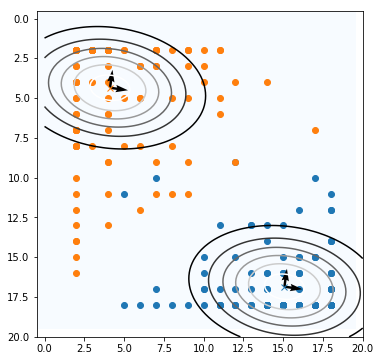

In [22]:
### adjust plots

transx = 2
transy = 2



x_train_class0 = reduced_x_train[np.where(y_train==0)] #### seperate classes
x_train_class1 = reduced_x_train[np.where(y_train==1)]


grid = np.zeros((20,20)) ## background
plt.imshow(grid,cmap="Blues",aspect=1)


plt.scatter(x_train_class0[:,0]+transx,x_train_class0[:,1]+transy, ) ## training data
plt.scatter(x_train_class1[:,0]+transx,x_train_class1[:,1]+transy)

plt.plot(mu[0,0]+transx,mu[0,1]+transy,'x') ## means
plt.plot(mu[1,0]+transx,mu[1,1]+transy,'x')



#### bivariat gaussians
x = np.linspace(0,20,100)
y = np.linspace(0,20,100)
x,y = np.meshgrid(x,y)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=mu[0]+[transx,transy], cov=covmat[0])
plt.contour(x,y,var.pdf(pos))
var = multivariate_normal(mean=mu[1]+[transx,transy], cov=covmat[1])
plt.contour(x,y,var.pdf(pos))



######## eigenvalue /vector decomposition

val, vec = np.linalg.eig(covmat[0])
for i,j in zip(val,vec):
    plt.quiver(mu[0,0]+transx,mu[0,1]+transy,np.sqrt(i)*j[0],np.sqrt(i)*j[1])
    
    
val, vec = np.linalg.eig(covmat[1])
for i,j in zip(val,vec):
    plt.quiver(mu[1,0]+transx,mu[1,1]+transy,np.sqrt(i)*j[0],np.sqrt(i)*j[1])

In [26]:
data_red=reduced_dim(data17)

## Performance evaluation

In [49]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
score=[]
for train_index, test_index in kf.split(data_red):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = data_red[train_index], data_red[test_index]
    y_train, y_test = target17[train_index], target17[test_index]
    
    y_train[np.where(y_train==1)],y_train[np.where(y_train==7)] = 0, 1
    y_test[np.where(y_test==1)],y_test[np.where(y_test==7)] = 0, 1
    
    mu, covmat, p = fit_qda(X_train,y_train)
   
    #print("Training data: %d out of %d elements correct" % (np.sum(predict_qda(mu,covmat,p,X_train)==y_train),len(y_train)))
    correct=np.sum(predict_qda(mu,covmat,p,X_test)==y_test)
    print("Test data: %d out of %d elements correct" % (correct,len(y_test)))
    score.append(correct/len(y_test))
print('Final Error rate: ',np.mean(score),'+-',np.std(score))

Test data: 36 out of 37 elements correct
Test data: 30 out of 36 elements correct
Test data: 34 out of 36 elements correct
Test data: 36 out of 36 elements correct
Test data: 36 out of 36 elements correct
Test data: 36 out of 36 elements correct
Test data: 36 out of 36 elements correct
Test data: 35 out of 36 elements correct
Test data: 32 out of 36 elements correct
Test data: 36 out of 36 elements correct
Final Error rate:  0.961186186186 +- 0.0544488936928


# LDA

In [ ]:
a=np.array([2,3,4])
b=